<a href="https://colab.research.google.com/github/Tyler-Pickett/HumpbackWhale_Bioacoustics/blob/main/EDA_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
import librosa
import librosa.display
import soundfile as sf

import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython import display as ipd

#from numpy import argmax
#import random
#from PIL import Image
#import csv

pd.set_option('display.max_colwidth', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import storage

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: pickett.m.t@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] pickett.m.t@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [pickett.m.t@gmail.com].

Pick cloud project to use: 
 [1] valiant

In [ ]:
!gsutil

Usage: gsutil [-D] [-DD] [-h header]... [-i service_account] [-m] [-o section:flag=value]... [-q] [-u user_project] [command [opts...] args...]
Available commands:
  acl              Get, set, or change bucket and/or object ACLs
  bucketpolicyonly Configure uniform bucket-level access
  cat              Concatenate object content to stdout
  compose          Concatenate a sequence of objects into a new composite object.
  config           Obtain credentials and create configuration file
  cors             Get or set a CORS JSON document for one or more buckets
  cp               Copy files and objects
  defacl           Get, set, or change default ACL on buckets
  defstorageclass  Get or set the default storage class on buckets
  du               Display object size usage
  hash             Calculate file hashes
  help             Get help about commands and topics
  hmac             CRUD operations on service account HMAC keys.
  iam              Get, set, or change bucket and/or obje

# dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/capstone/date_loc.csv')
df

,audit_name,flac_compressed_xwav_object,subchunk_index,label_is_strong,implicit_negatives,label,begin_rel_subchunk,end_rel_subchunk,begin_utc,end_utc,year,month,year_month,date,og_location,location,latitude,latitude_dir,latitude_full,longtitude,longtitude_dir,longtitude_full
0,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050606_123845.d20.x.flac,13,True,True,Other,0.108,0.108,15:00.1,15:00.1,2005,6,2005-06,2005-06-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W
1,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050702_031345.d20.x.flac,17,True,True,Other,0.213,0.213,15:00.2,15:00.2,2005,7,2005-07,2005-07-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W
2,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050801_110500.d20.x.flac,4,True,True,Other,0.249,0.249,30:00.2,30:00.2,2005,8,2005-08,2005-08-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W
3,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050908_025000.d20.x.flac,16,True,True,Other,0.213,0.213,30:00.2,30:00.2,2005,9,2005-09,2005-09-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W
4,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050908_025000.d20.x.flac,5,True,True,Other,23.207,23.207,16:38.2,16:38.2,2005,9,2005-09,2005-09-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31610,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake06/Wake_S_06_160417_020115.df20.x.flac,368,False,False,Device,0.000,75.000,01:15.0,02:30.0,2016,4,2016-04,2016-04-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E
31611,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake06/Wake_S_06_160417_020115.df20.x.flac,438,False,False,Other,0.000,75.000,33:45.0,35:00.0,2016,4,2016-04,2016-04-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E
31612,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake06/Wake_S_06_160428_060345.df20.x.flac,379,False,False,Device,0.000,75.000,32:30.0,33:45.0,2016,4,2016-04,2016-04-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E
31613,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake07/Wake_S_07_160804_213345.df20.x.flac,845,False,False,Vessel,0.000,75.000,31:15.0,32:30.0,2016,8,2016-08,2016-08-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31615 entries, 0 to 31614
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   audit_name                   31615 non-null  object        
 1   flac_compressed_xwav_object  31615 non-null  object        
 2   subchunk_index               31615 non-null  int64         
 3   label_is_strong              31615 non-null  bool          
 4   implicit_negatives           31615 non-null  bool          
 5   label                        31615 non-null  object        
 6   begin_rel_subchunk           31615 non-null  float64       
 7   end_rel_subchunk             31615 non-null  float64       
 8   begin_utc                    31615 non-null  object        
 9   end_utc                      31615 non-null  object        
 10  year                         31615 non-null  int64         
 11  month                        31615 non-nu

In [ ]:
df['record_length'] = df['end_rel_subchunk'] - df['begin_rel_subchunk']
df

,audit_name,flac_compressed_xwav_object,subchunk_index,label_is_strong,implicit_negatives,label,begin_rel_subchunk,end_rel_subchunk,begin_utc,end_utc,year,month,year_month,date,og_location,location,latitude,latitude_dir,latitude_full,longtitude,longtitude_dir,longtitude_full,record_length
0,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050606_123845.d20.x.flac,13,True,True,Other,0.108,0.108,15:00.1,15:00.1,2005,6,2005-06,2005-06-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W,0.0
1,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050702_031345.d20.x.flac,17,True,True,Other,0.213,0.213,15:00.2,15:00.2,2005,7,2005-07,2005-07-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W,0.0
2,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050801_110500.d20.x.flac,4,True,True,Other,0.249,0.249,30:00.2,30:00.2,2005,8,2005-08,2005-08-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W,0.0
3,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050908_025000.d20.x.flac,16,True,True,Other,0.213,0.213,30:00.2,30:00.2,2005,9,2005-09,2005-09-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W,0.0
4,initial,gs://noaa-passive-bioacoustic/pifsc/CrossSM/CSM01/Cross_A_01_050908_025000.d20.x.flac,5,True,True,Other,23.207,23.207,16:38.2,16:38.2,2005,9,2005-09,2005-09-01,CrossSM/CS,Cross Seamount,18.75,N,18.75N,158.25,W,158.25W,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31610,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake06/Wake_S_06_160417_020115.df20.x.flac,368,False,False,Device,0.000,75.000,01:15.0,02:30.0,2016,4,2016-04,2016-04-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E,75.0
31611,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake06/Wake_S_06_160417_020115.df20.x.flac,438,False,False,Other,0.000,75.000,33:45.0,35:00.0,2016,4,2016-04,2016-04-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E,75.0
31612,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake06/Wake_S_06_160428_060345.df20.x.flac,379,False,False,Device,0.000,75.000,32:30.0,33:45.0,2016,4,2016-04,2016-04-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E,75.0
31613,testexpand,gs://noaa-passive-bioacoustic/pifsc/Wake/Wake07/Wake_S_07_160804_213345.df20.x.flac,845,False,False,Vessel,0.000,75.000,31:15.0,32:30.0,2016,8,2016-08,2016-08-01,Wake/Wake0,Wake Island,19.17,N,19.17N,166.37,E,166.37E,75.0


# Metadata EDA

Breakdown labels: value counts, distributions, time of clips and bioaccoustics, yearly distributions of humpback whales(Mn)

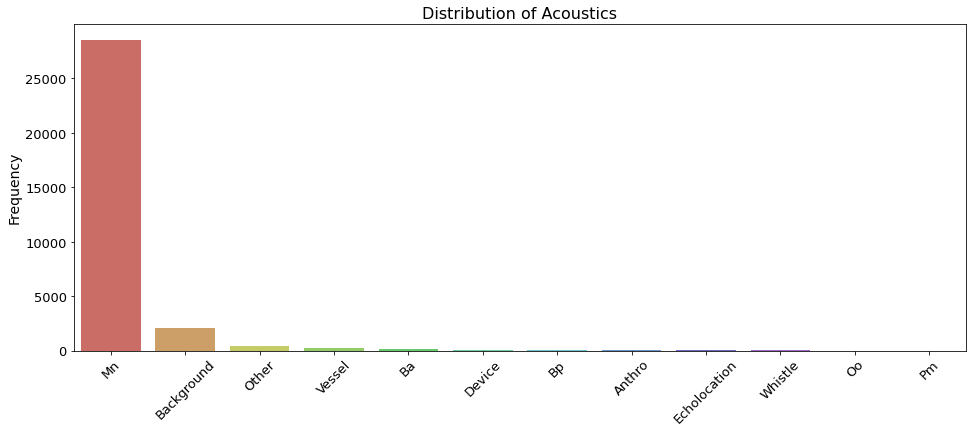

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['label'], palette="hls", order = df['label'].value_counts().index)
ax

plt.title("Distribution of Acoustics", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

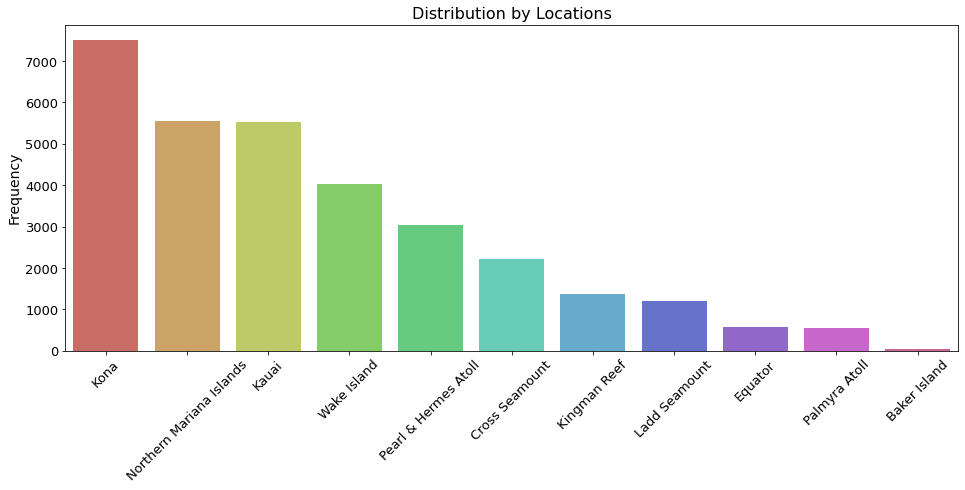

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['location'], palette="hls", order = df['location'].value_counts().index)
ax

plt.title("Distribution by Locations", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

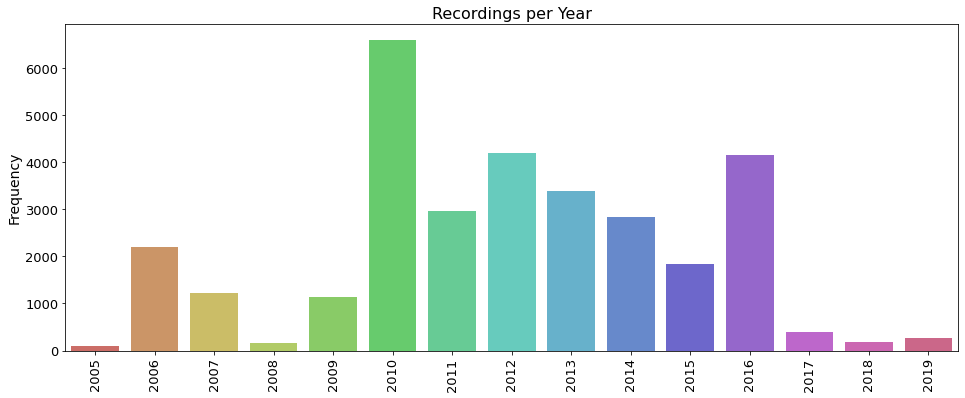

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['year'], palette="hls")

plt.title("Recordings per Year", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

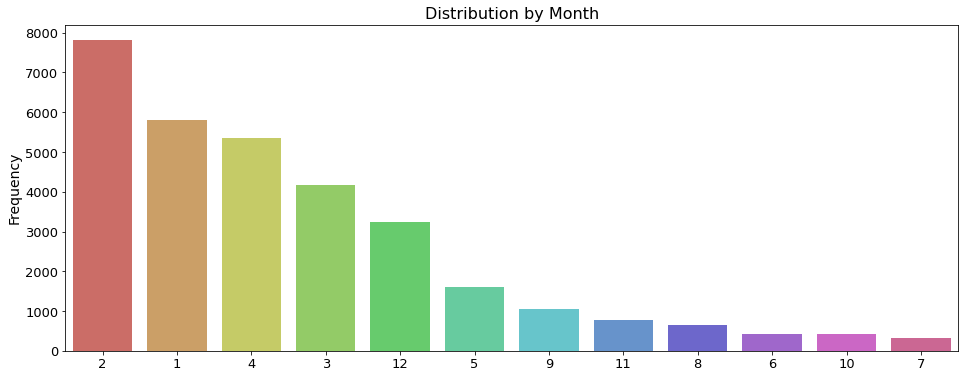

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['month'], palette="hls", order = df['month'].value_counts().index)
ax

plt.title("Distribution by Month", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("");

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(df['record_length'], palette="hls")

plt.title("Recording Length Distribution", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

# Audio EDA

characteristics of audio files(amplitude, frequency, decibles, sampling rate)

In [ ]:
# file path: gs://bioacoustics-www1/sounds/Cross_02_060203_071428.d20_7.wav
# check indvidual file, to ensure quality and strong target label(Humpback Whale)
FILENAME = 'https://storage.googleapis.com/bioacoustics-www1/sounds/Cross_02_060203_071428.d20_7.wav'
ipd.Audio(FILENAME)

In [ ]:
# librosa cant recognize google file paths... copying file to drive for new path
# !gsutil -m cp -r gs://bioacoustics-www1/sounds/Cross_02_060203_071428.d20_7.wav '/content/drive/My Drive/Colab Notebooks/capstone/'
# SUCCESS!

Copying gs://bioacoustics-www1/sounds/Cross_02_060203_071428.d20_7.wav...
/ [1/1 files][  1.4 MiB/  1.4 MiB] 100% Done                                    
Operation completed over 1 objects/1.4 MiB.                                      


In [ ]:
audio = '/content/drive/MyDrive/Colab Notebooks/capstone/Cross_02_060203_071428.d20_7.wav'

In [ ]:
#'gs://bioacoustics-www1/sounds/Cross_02_060203_071428.d20_7.wav'
# Import Humpback Whale file 
y, sr = librosa.load(audio)

print('y:', y, '\n') # measure of varying pressure strengths(y) in sequence(whihc together makes the sound(s))
print('shape of y:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n') # sr(sample rate) number of samples of audio per second, measured in Hz or kHz

# Verify length of the audio
print('Length of Recording:', np.shape(y)[0]/sr, 'seconds')

y: [ 0.9440859   1.074907    0.95844686 ... -0.17326926 -0.13579144
 -0.06649487] 

shape of y: (1653750,) 

Sample Rate (KHz): 22050 

Length of Recording: 75.0 seconds


In [ ]:
# Trim silence from an audio signal
audio_file, _ = librosa.effects.trim(y)

# trimmed audio result
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.9440859   1.074907    0.95844686 ... -0.17326926 -0.13579144
 -0.06649487] 

Audio File shape: (1653750,)


Sound Wave

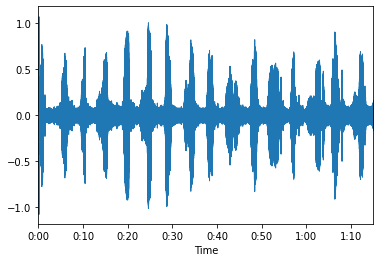

In [ ]:
# plot soundwaves
librosa.display.waveplot(y, sr=sr)

Fourier Transform

Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies. Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
# Default hop length
hop_length = 512 # number audio of frames between STFT columns

# Short-time Fourier transform (STFT)
audio_stft = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

Spectrogram

visual representation of the spectrum of frequencies of a signal as it varies with time.

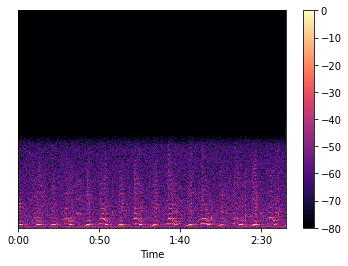

In [ ]:
spectro = librosa.amplitude_to_db(audio_stft, ref=np.max)
librosa.display.specshow(spectro, sr=10000, x_axis="time")
plt.colorbar();

Mel-Spectrogram

A Spectrogram, with a Mel Scale on the y axis. The Mel Scale, is the result of some non-linear transformation of the frequency scale.

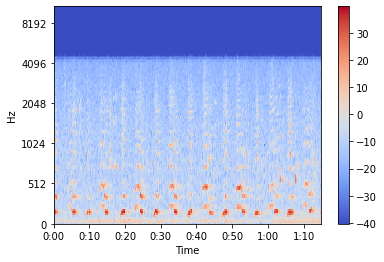

In [ ]:
melspec = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128))
librosa.display.specshow(melspec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar();

MFCC(Mel Frequency Cepstral Coefficients)

[Text(0.5, 1.0, 'MFCC')]

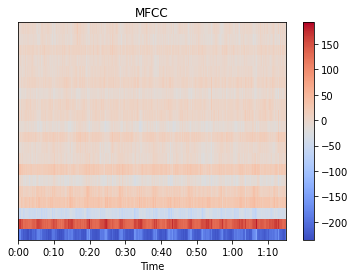

In [ ]:
# generate coefficients
mfcc = librosa.feature.mfcc(S=melspec)

# visualize coefficients 
fig, ax = plt.subplots()

img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)

fig.colorbar(img, ax=ax)

ax.set(title='MFCC')

# Audio Preprocessing

# mel spectro generation

In [ ]:
DATA_DIR = Path("../input/rfcx-species-audio-detection/train")

In [ ]:
flacfiles = list(DATA_DIR.glob("*.flac"))
y, sr = librosa.load(flacfiles[0], duration=10)
y, sr

Audio(y, rate=sr)

librosa.display.waveplot(y, sr=sr);

melspec = librosa.power_to_db(librosa.feature.melspectrogram(y, sr=sr, n_mels=128))
librosa.display.specshow(melspec, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar();

In [ ]:
import shutil
import joblib

from tqdm.notebook import tqdm

In [ ]:
# create paths for entire audio data, first train and first test 
DATA_ROOT = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/capstone/auds")
TRAIN_AUDIO_ROOT = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/capstone/auds/CSM02")
TEST_AUDIO_ROOT = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/capstone/auds/CSM01")

In [ ]:
# create dataframe of file paths, how each file will be called for spectrogram generation
df_train = pd.DataFrame({
    "recording_id": [path.stem for path in pathlib.Path(TRAIN_AUDIO_ROOT).glob("*.flac")],
})

df_test = pd.DataFrame({
    "recording_id": [path.stem for path in pathlib.Path(TEST_AUDIO_ROOT).glob("*.flac")],
})

In [ ]:
print(df_train)
df_test

,recording_id
0,Cross_A_02_060106_152413.d20.x
1,Cross_A_02_060106_174052.d20.x
2,Cross_A_02_060106_165458.d20.x
3,Cross_A_02_060106_182543.d20.x
4,Cross_A_02_060106_233554.d20.x
...,...
1499,Cross_A_02_060106_122229.d20.x
1500,Cross_A_02_060106_143922.d20.x
1501,Cross_A_02_060106_161007.d20.x
1502,Cross_A_02_060106_130837.d20.x


# The Mel Spectrogram is the result of the following pipeline:


Separate to windows: Sample the input with windows of size n_fft=2048, making hops of size hop_length=512 each time to sample the next window.

Fourier Transform for each window to transform from time domain to frequency domain.

Generate a Mel scale: Take the entire frequency spectrum, and separate it into n_mels=128 evenly spaced frequencies.
Not by distance on the frequency dimension, but distance as it is heard by the human ear.

Generate Spectrogram: For each window, decompose the magnitude of the signal into its components, corresponding to the frequencies in the mel scale.

In [ ]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

In [ ]:
# params class to pass into mel-spectrogram generation functions
class params:
    """
    Parameters used for the audio data
    """
    sr = 10000,
    n_fft=n_fft
    # Melspectrogram
    n_mels = 128

In [ ]:
# function to load audio files from dataset
def load_audio(record, sr=sr, root=""):
    y, _ = librosa.load(
        root.joinpath(record).with_suffix(".x.flac").as_posix(),
        sr=sr 
    )
    return y

In [ ]:
# function to make mel spectrogram from audio file
def compute_melspec(y, params):
    """
    Computes a mel-spectrogram and puts it at decibel scale
    Arguments:
        y {np array} -- signal
        params {AudioParams} -- Parameters to use for the spectrogram. Expected to have the attributes sr, n_mels, f_min, f_max
    Returns:
        np array -- Mel-spectrogram
    """
    melspec = librosa.feature.melspectrogram(
        y, sr=params.sr, n_mels=params.n_mels
    )

    melspec = librosa.power_to_db(melspec).astype(np.float32)
    return melspec

In [ ]:
# pull file from audio data
y = load_audio(df_train["recording_id"][50], params.sr, TRAIN_AUDIO_ROOT)

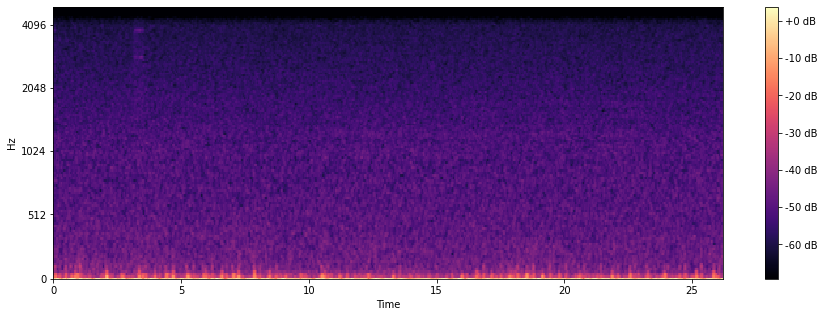

In [ ]:
# check mel spectrogram function with single file
melspec = compute_melspec(y, params)
fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(
    melspec[:, :512], 
    sr=10000,
    x_axis='time', 
    y_axis='mel', 
    ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

In [ ]:
import skimage.io

In [ ]:
# test run saving mel spectro gram to .png image file
skimage.io.imsave("melspec.png", melspec)

In [ ]:
%%timeit 

y = load_audio(df_train["recording_id"][50], params.sr, TRAIN_AUDIO_ROOT)
melspec = compute_melspec(y, params)

1 loop, best of 5: 1.61 s per loop


In [ ]:
# function to load train audio files, make mel spectrograms, and save them as .png files
def load_and_save_train(record):
    y = load_audio(record, params.sr, TRAIN_AUDIO_ROOT)
    melspec = compute_melspec(y, params)

    skimage.io.imsave(MEL_TRAIN + record + ".png", melspec)

In [ ]:
# create variable for path to save images to
MEL_TRAIN = 'CSM02/'
os.mkdir(MEL_TRAIN)

In [ ]:
# initialize load and save function, with tqdm to track progress
 _ = joblib.Parallel(n_jobs=8)(
     joblib.delayed(load_and_save_train)(record) for record in tqdm(df_train['recording_id'].values)
)

In [ ]:
# move .png folder to drive
shutil.move("/content/CSM02", "/content/drive/MyDrive/Colab Notebooks/capstone")

'/content/drive/MyDrive/Colab Notebooks/capstone/CSM02'